**In this notebook, we will do multiclass classification on newswires dataset.**

**Importing packages**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In this notebook, we will be using tensorflow developer version 2.2.0 for our task in hand.

<b> Loading data </b>

In [0]:
(train_data,train_labels),(test_data,test_labels)=tf.keras.datasets.reuters.load_data(num_words=10000,test_split=0.2)

In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
train_labels[0]

3

In [5]:
import numpy as np
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Here we have 46 unique categories to classify 

In [0]:
word_index = tf.keras.datasets.reuters.get_word_index()

In [0]:
reverse_word_index= dict([(value, key) for key,value in word_index.items()])

In [0]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

**Preparing data to train**

In [0]:
def vectorize_sequence(text,dimensions=10000):
  result = np.zeros((len(text),dimensions))
  for i,sequence in enumerate(text):
    result[i,sequence]=1
  return result

In [0]:
x_train = vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [0]:
train_label=tf.keras.utils.to_categorical(train_labels,num_classes=46)
test_label=tf.keras.utils.to_categorical(test_labels,num_classes=46)

In [13]:
train_label.shape

(8982, 46)

In [14]:
x_train.shape

(8982, 10000)

**Baseline model**

In [0]:
tf.keras.backend.clear_session()

In [16]:
from tensorflow.keras import layers

# here we  are using functional API
input = tf.keras.Input(shape=(10000,),dtype='int64')

x = layers.Dense(128,activation='relu')(input)

x = layers.Dropout(0.5)(x)

x = layers.Dense(64, activation="relu")(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(46, activation="softmax", name="predictions")(x)

model = tf.keras.Model(input, output)

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
predictions (Dense)          (None, 46)                2990      
Total params: 1,291,374
Trainable params: 1,291,374
Non-trainable params: 0
___________________________________________________

In [17]:
history=model.fit(x=x_train, y=train_label, batch_size = 512,validation_data=(x_test, test_label),epochs = 9)

Epoch 1/9
18/18 [==============================] - 2s 103ms/step - loss: 2.5807 - accuracy: 0.4623 - val_loss: 1.6403 - val_accuracy: 0.6309
Epoch 2/9
18/18 [==============================] - 2s 92ms/step - loss: 1.6469 - accuracy: 0.6257 - val_loss: 1.3883 - val_accuracy: 0.6848
Epoch 3/9
18/18 [==============================] - 2s 91ms/step - loss: 1.3980 - accuracy: 0.6762 - val_loss: 1.2616 - val_accuracy: 0.7106
Epoch 4/9
18/18 [==============================] - 2s 90ms/step - loss: 1.2215 - accuracy: 0.7116 - val_loss: 1.1991 - val_accuracy: 0.7208
Epoch 5/9
18/18 [==============================] - 2s 89ms/step - loss: 1.1074 - accuracy: 0.7383 - val_loss: 1.1177 - val_accuracy: 0.7422
Epoch 6/9
18/18 [==============================] - 2s 89ms/step - loss: 1.0067 - accuracy: 0.7611 - val_loss: 1.0780 - val_accuracy: 0.7573
Epoch 7/9
18/18 [==============================] - 2s 91ms/step - loss: 0.9232 - accuracy: 0.7788 - val_loss: 1.0423 - val_accuracy: 0.7711
Epoch 8/9
18/18 [==

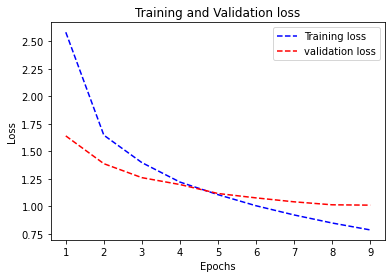

In [18]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,10)
plt.plot(epochs, loss_train, 'b--', label='Training loss')
plt.plot(epochs, loss_val, 'r--', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

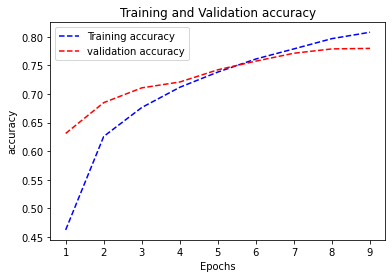

In [19]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,10)
plt.plot(epochs, loss_train, 'b--', label='Training accuracy')
plt.plot(epochs, loss_val, 'r--', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()